In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import scipy.stats as st
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('/content/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df = pd.read_csv('diabetes.csv')
Diabetes = df["Pregnancies"][df["Outcome"]==1]
Diabetes = Diabetes.rename('Diabetes')
Diabetes = Diabetes.reset_index()
print(Diabetes)

nonDiabetes = df["Pregnancies"][df["Outcome"]==0]
nonDiabetes = nonDiabetes.rename('Non Diabetes')
nonDiabetes = nonDiabetes.reset_index()
non_diabetes = nonDiabetes[['Non Diabetes']]
diabetes = Diabetes[['Diabetes']]
print(non_diabetes)
print(diabetes)

     index  Diabetes
0        0         6
1        2         8
2        4         0
3        6         3
4        8         2
..     ...       ...
263    755         1
264    757         0
265    759         6
266    761         9
267    766         1

[268 rows x 2 columns]
     Non Diabetes
0               1
1               1
2               5
3              10
4               4
..            ...
495             9
496            10
497             2
498             5
499             1

[500 rows x 1 columns]
     Diabetes
0           6
1           8
2           0
3           3
4           2
..        ...
263         1
264         0
265         6
266         9
267         1

[268 rows x 1 columns]


In [ ]:
merge = pd.concat([diabetes,non_diabetes],axis=1,join='inner')
merge.dtypes
print(merge)

     Diabetes  Non Diabetes
0           6             1
1           8             1
2           0             5
3           3            10
4           2             4
..        ...           ...
263         1             0
264         0             2
265         6             3
266         9             1
267         1             2

[268 rows x 2 columns]


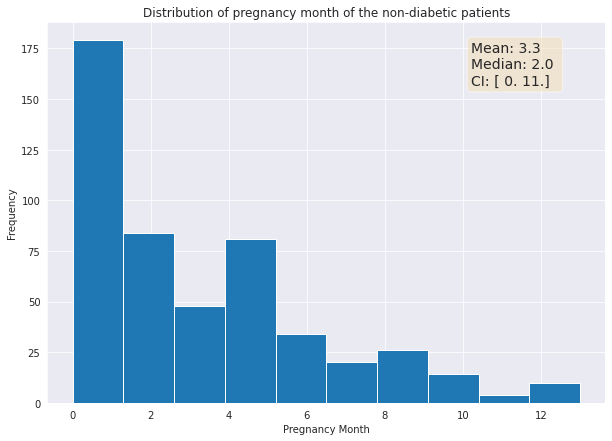

In [ ]:
# Distribution for Non Diabetes:
first_fares = df["Pregnancies"][df["Outcome"]==0]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Pregnancy Month")
plt.ylabel("Frequency")
plt.title("Distribution of pregnancy month of the non-diabetic patients")
plt.show()

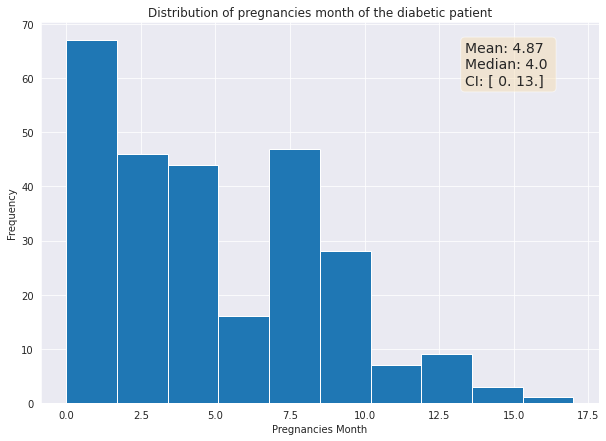

In [ ]:
# Distribution for Diabetes:
first_fares = df["Pregnancies"][df["Outcome"]==1]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Pregnancies Month")
plt.ylabel("Frequency")
plt.title("Distribution of pregnancies month of the diabetic patient")
plt.show()

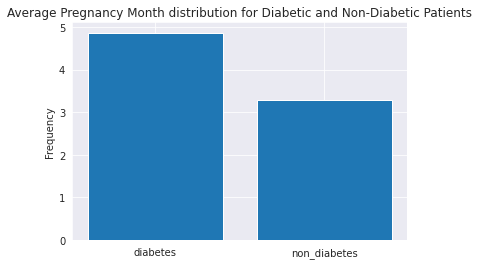

In [ ]:
#Presenting Average pregnancy months for Diabetic and Non Diabetic Patients
x = ["diabetes" , "non_diabetes"]
y = [np.mean(df["Pregnancies"][df["Outcome"]==1]), np.mean(df["Pregnancies"][df["Outcome"]==0])]
plt.bar(x, y)
plt.ylabel("Frequency")
plt.title("Average Pregnancy Month distribution for Diabetic and Non-Diabetic Patients")
plt.show()

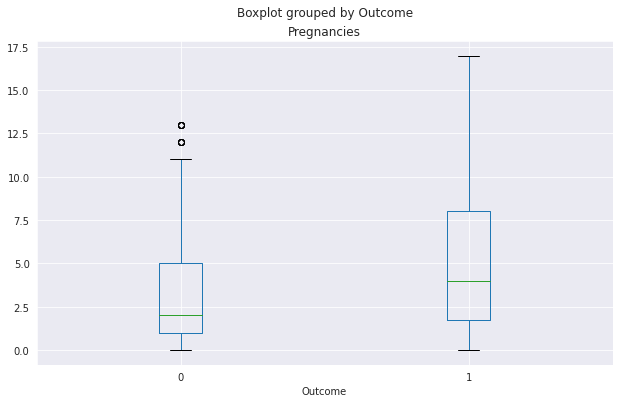

In [ ]:
df.boxplot(column='Pregnancies', by='Outcome', figsize=(10,6))


95% Confidence Interval

In [ ]:
#to calculate proportion
class Proportion:
    def __init__(self,n_yes,n,z):
        """Z multiplier from appropriate distribution based on desired confidence level and sample design"""
        self.n_yes = n_yes
        self.n=n
        self.z=z
        self.best_estimate = round(n_yes/n,2)

    def estimated_standard_error(self):
        import numpy as np
        return np.sqrt((self.best_estimate*(1-self.best_estimate))/self.n)

    def margin_of_error(self):
        return self.z*self.estimated_standard_error()

    def proportion(self):
        lcb = self.best_estimate - (self.z*self.estimated_standard_error())
        ucb = self.best_estimate + (self.z*self.estimated_standard_error())
        return (lcb,ucb)

#to calculate mean
class Mean:
    import numpy as np
    def __init__(self,mean,std,n,t):
        '''t multiplier comes from t distribution with n-1 degree of freedom'''
        self.best_estimate = mean
        self.std = std
        self.n = n
        self.t = t
        self.estimated_se = self.std / np.sqrt(self.n)

    def moe(self):
        return self.t * self.estimated_se

    def mean(self):
        lcb = self.best_estimate - self.moe()
        ucb = self.best_estimate + self.moe()
        return (lcb,ucb)

#to calculate difference in mean
class diffMean:
    import numpy as np
    def __init__(self,x1,x2,std1,std2,n1,n2,t):
        '''t multiplier comes from t distribution with appropriate degree of freedom'''
        self.best_estimate1 = x1
        self.best_estimate2 = x2
        self.std1 = std1
        self.std2 = std2
        self.n1 = n1
        self.n2 = n2
        self.t = t
        self.pooled_estimated_se = np.sqrt((np.sqrt(((self.n1-1)*(self.std1**2) + (self.n2-1)*(self.std2**2)) / ((self.n1+self.n2)-2))) * (np.sqrt((1/self.n1)+(1/self.n2))))
        self.unpooled_estimated_se = np.sqrt(((self.std1**2)/self.n1) + ((self.std2**2)/self.n2))

    def pooledMoe(self):
        return (self.t)*(self.pooled_estimated_se)

    def pooledMean(self):
        lcb = (self.best_estimate1 - self.best_estimate2) - self.pooledMoe()
        ucb = (self.best_estimate1 - self.best_estimate2) + self.pooledMoe()
        return (lcb,ucb)

    def unpooledMoe(self):
        return self.t * self.unpooled_estimated_se

    def unpooledMean(self):
        lcb = (self.best_estimate1 - self.best_estimate2) - self.unpooledMoe()
        ucb = (self.best_estimate1 - self.best_estimate2) + self.unpooledMoe()
        return (lcb,ucb)

In [ ]:
df.Outcome.replace({0:'Non-Diab',1:'Diab'},inplace=True)
print(df.Outcome.value_counts())

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64


In [ ]:
n = df.shape[0]
diabetic = df.Outcome.value_counts().loc['Diab']

print("Number of total observation are:",n)
print("Number of Diabetic Patient are:",diabetic)

#Let us construct a 95% CI using our written code
#I am using z=1.96 for 95% C.I.
diab_pro = Proportion(diabetic, n ,1.96)

print("\nPrinting Calculations...")
print("Best Point Estimate for Proportion of People with Diabetes is:", diab_pro.best_estimate*100)
print("Estimated Standard Error for Proportion of People with Diabetes is:",diab_pro.estimated_standard_error())
print("Margin of Error is for Proportion of People with Diabetes is:",diab_pro.margin_of_error())
print("95% Confidence Interval for Proportion of People with Diabetes is:",diab_pro.proportion())

Number of total observation are: 768
Number of Diabetic Patient are: 268

Printing Calculations...
Best Point Estimate for Proportion of People with Diabetes is: 35.0
Estimated Standard Error for Proportion of People with Diabetes is: 0.017211157960269067
Margin of Error is for Proportion of People with Diabetes is: 0.03373386960212737
95% Confidence Interval for Proportion of People with Diabetes is: (0.3162661303978726, 0.38373386960212735)


In [ ]:
#Let us now calculate same thing using statsmodel
import statsmodels.api as sm
print("\n95% Confidence Interval for Proportion of People with Diabetes is:",sm.stats.proportion_confint(diabetic, n))


95% Confidence Interval for Proportion of People with Diabetes is: (0.3152483405027714, 0.38266832616389523)


**Problem Statement #1**

What is average month of Pregnancy for Patients with diabetes?

In [ ]:
df_diabetic = df[df.Outcome=='Diab']
df_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
4,0,137,40,35,168,43.1,2.288,33,Diab
6,3,78,50,32,88,31.0,0.248,26,Diab
8,2,197,70,45,543,30.5,0.158,53,Diab


In [ ]:
mean_preg_diab = Mean(df_diabetic['Pregnancies'].mean(),df_diabetic['Pregnancies'].std(),df_diabetic.shape[0],1.962)
print("\nPrinting Calculations...")
print("Best point estimate for Mean Pregnancy Month of Patients with diabetes:", mean_preg_diab.best_estimate)
print("Estimated Standard Error for Mean Pregnancy Month of Patients with diabetes:",mean_preg_diab.estimated_se)
print("Margin of Error for Mean Pregnancy Month of Patients with diabetes:",mean_preg_diab.moe())
print("95% Confidence Interval for Mean Pregnancy Month of Patients with diabetes:",mean_preg_diab.mean(),"\n")


Printing Calculations...
Best point estimate for Mean Pregnancy Month of Patients with diabetes: 4.865671641791045
Estimated Standard Error for Mean Pregnancy Month of Patients with diabetes: 0.2285325476073356
Margin of Error for Mean Pregnancy Month of Patients with diabetes: 0.44838085840559244
95% Confidence Interval for Mean Pregnancy Month of Patients with diabetes: (4.417290783385453, 5.314052500196637) 



In [ ]:
#Let us now calculate same thing using statsmodel
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (4.417756079185482, 5.313587204396608)


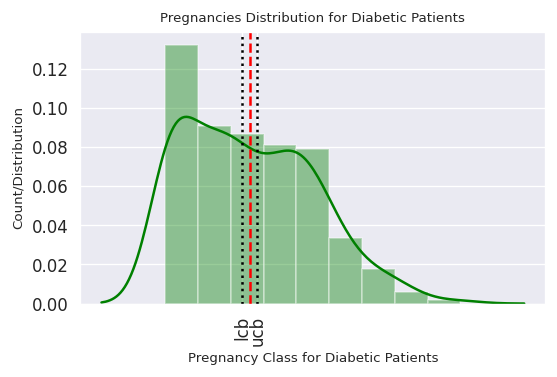

In [ ]:
#let us make some figure to interpret the result
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_diabetic['Pregnancies'],color='green')
plt.axvline(x=4.417756079185482,color = 'black',ls=':')
plt.axvline(x=5.313587204396608,color = 'black',ls=':')
plt.axvline(x=mean_preg_diab.best_estimate,color='red',ls='--')
plt.xticks([4.417756079185482,5.313587204396608],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Pregnancies Distribution for Diabetic Patients',fontdict={'fontsize':8})
plt.show()

**Problem Statement #2**

What is the average month of Pregnancy for Non-Diabetic Patients?

In [ ]:
df_non_diabetic = df[df.Outcome=='Non-Diab']
df_non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,Non-Diab
3,1,89,66,23,94,28.1,0.167,21,Non-Diab
5,5,116,74,0,0,25.6,0.201,30,Non-Diab
7,10,115,0,0,0,35.3,0.134,29,Non-Diab
10,4,110,92,0,0,37.6,0.191,30,Non-Diab


In [ ]:
print("\nPrinting Calculations...")
mean_preg_non_diab = Mean(df_non_diabetic['Pregnancies'].mean(),df_non_diabetic['Pregnancies'].std(),df_non_diabetic.shape[0],1.962)
print("Best point estimate for Mean Pregnancy Month of non diabetic patients:", mean_preg_non_diab.best_estimate)
print("Estimated Standard Error for Mean Pregnancy Month of non diabetic patients:",mean_preg_non_diab.estimated_se)
print("Margin of Error for Mean Pregnancy Month of non diabetic patients:",mean_preg_non_diab.moe())
print("95% Confidence Interval for Mean Pregnancy Month of non diabetic patients:",mean_preg_non_diab.mean(),"\n")


Printing Calculations...
Best point estimate for Mean Pregnancy Month of non diabetic patients: 3.298
Estimated Standard Error for Mean Pregnancy Month of non diabetic patients: 0.13493259654813752
Margin of Error for Mean Pregnancy Month of non diabetic patients: 0.2647377544274458
95% Confidence Interval for Mean Pregnancy Month of non diabetic patients: (3.0332622455725544, 3.5627377544274457) 



In [ ]:
#Let us now calculate same thing using statsmodel
print("\n95% C.I. with statsmodels library:",sm.stats.DescrStatsW(df_non_diabetic['Pregnancies']).zconfint_mean())


95% C.I. with statsmodels library: (3.033536970425177, 3.562463029574823)


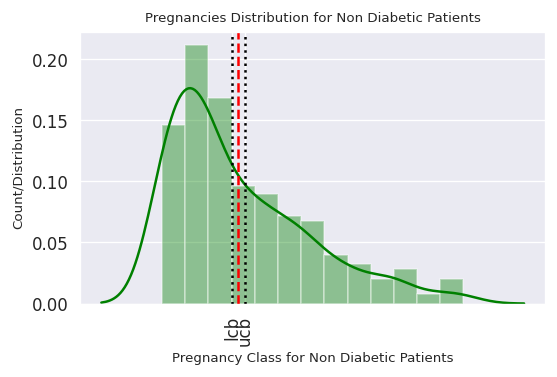

In [ ]:
#let us make some figure to interpret the result
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(df_non_diabetic['Pregnancies'],color='green')
plt.axvline(x=3.0332622455725544,color = 'black',ls=':')
plt.axvline(x=3.5627377544274457,color = 'black',ls=':')
plt.axvline(x=mean_preg_non_diab.best_estimate,color='red',ls='--')
plt.xticks([3.0332622455725544, 3.5627377544274457],['lcb','ucb'],rotation=90)
plt.xlabel('Pregnancy Class for Non Diabetic Patients',fontdict={'fontsize':8})
plt.ylabel('Count/Distribution',fontdict={'fontsize':8})
plt.title('Pregnancies Distribution for Non Diabetic Patients',fontdict={'fontsize':8})
plt.show()

**Problem Statement #3**

Considering Diabetic-Non Diabetic patients, do diabetic and non-diabetic patients differ significantly in mean pregnancies month?

In [ ]:
print("\nSample Information:\n")
df.groupby('Outcome').describe()['Pregnancies'].transpose().loc[['mean','std'],:]


Sample Information:



Outcome,Diab,Non-Diab
mean,4.865672,3.298000
std,3.741239,3.017185


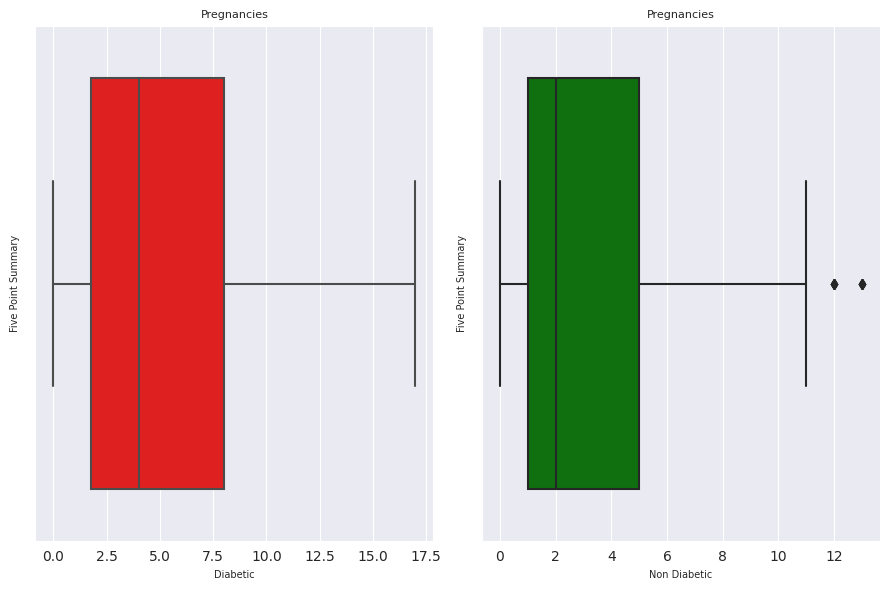

In [ ]:
#let us look at variance of both category
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=100,figsize = (9,6))

plot0 = sns.boxplot(df_diabetic['Pregnancies'],ax=axes[0],orient='v',color = 'red')
axes[0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Diabetic',fontdict={'fontsize':7})
axes[0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot1 = sns.boxplot(df_non_diabetic['Pregnancies'],ax=axes[1],orient='v',color='green')
axes[1].set_title('Pregnancies',fontdict={'fontsize':8})
axes[1].set_xlabel('Non Diabetic',fontdict={'fontsize':7})
axes[1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

In [ ]:
x1 = df_diabetic.Pregnancies.mean()
x2 = df_non_diabetic.Pregnancies.mean()
std1 = df_diabetic.Pregnancies.std()
std2 = df_non_diabetic.Pregnancies.std()
n1 = df_diabetic.shape[0]
n2 = df_non_diabetic.shape[0]

In [ ]:
mean_diff_preg = diffMean(x1,x2,std1,std2,n1,n2,1.98)
mean_diff_preg.pooledMean()

print("\nPrinting Calculations...")
print("Best point estimate for (μ1 − μ2 ): Pregnancies Month:", (mean_diff_preg.best_estimate1-mean_diff_preg.best_estimate2))
print("Estimated Standard Error for (μ1 − μ2 ): Pregnancies Month:",mean_diff_preg.pooled_estimated_se)
print("Margin of Error for (μ1 − μ2 ): Pregnancies Month:",mean_diff_preg.pooledMoe())
print("95% Confidence Interval for (μ1 − μ2 ): Pregnancies Month:",mean_diff_preg.pooledMean(),"\n")


Printing Calculations...
Best point estimate for (μ1 − μ2 ): Pregnancies Month: 1.567671641791045
Estimated Standard Error for (μ1 − μ2 ): Pregnancies Month: 0.4988975585853227
Margin of Error for (μ1 − μ2 ): Pregnancies Month: 0.987817165998939
95% Confidence Interval for (μ1 − μ2 ): Pregnancies Month: (0.579854475792106, 2.5554888077899838) 

